In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"99449922-e925-49ad-97ef-71897320ac5a\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Externship 1_Feature dimension reduction and XGBoost model\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14580 entries, 0 to 14579
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Food                  14580 non-null  object 
 1   Freq(Hz)              14580 non-null  float64
 2   Z(Ohm)                14518 non-null  float64
 3   PA                    14518 non-null  float64
 4   Time(m)               14580 non-null  int64  
 5   R+                    14580 non-null  int64  
 6   Fat                   14580 non-null  float64
 7   Cholesterol           14580 non-null  float64
 8   Sodium                14580 non-null  float64
 9   Potassium             14580 non-null  float64
 10  Total carbohydrate    14580 non-null  float64
 11  Protein               14580 non-null  float64
 12  pH                    14580 non-null  float64
 13  ORP                   14580 non-null  float64
 14  Conductivity (100H)   14580 non-null  float64
 15  Conductivity (400H)

Text(0.5, 1.0, 'Correlation Heatmap')

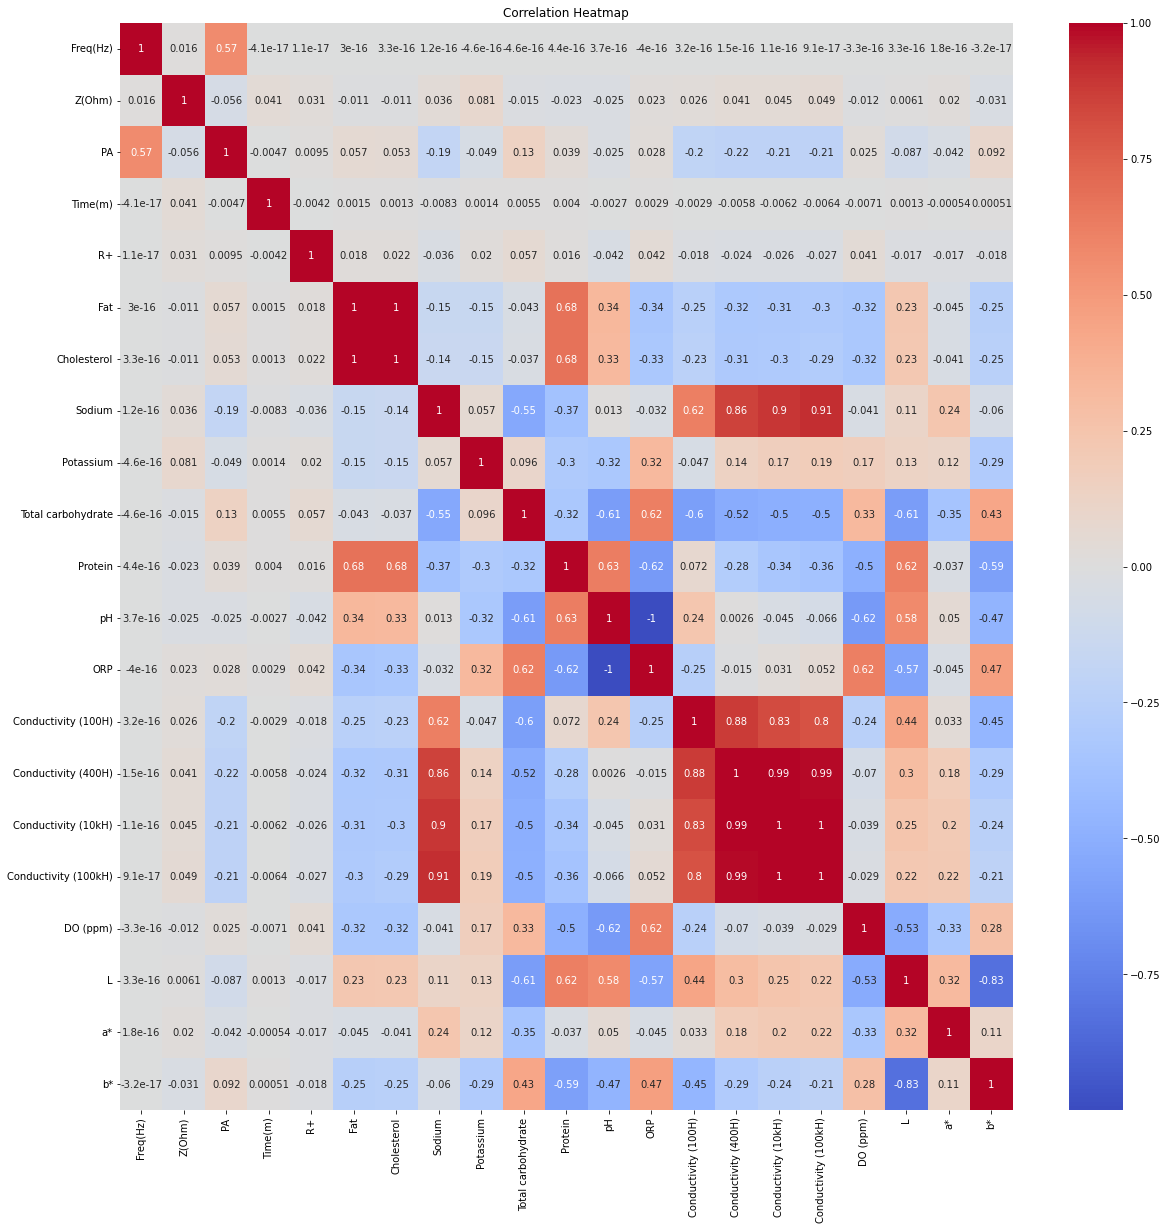

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

xls = pd.ExcelFile('final_data.xlsx')
data = pd.read_excel(xls, 'Sheet1')

data.info()
data.shape

plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")

## HIGHLY CORRELATED FEATURES



Sodium & Conductivity

Fat and Cholesterol

pH and ORP

L and b*

Protein - Fat & Cholesterol





#### MULTICOLLINEARITY



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_excel(xls,'Sheet1')
df = df[df['Food']!='Tomato Juice']
# Split the data into features and target variable
X = df.drop(columns=['R+'])
y = df['R+']
# Assuming 'x0', 'x1', and 'x2' are column names in the DataFrame df_sample
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif


vif_df_1 = calc_vif(X[["Sodium", "Conductivity (100H)"]])
vif_df_1

,variables,VIF
0,Sodium,2.236082
1,Conductivity (100H),2.236082


In [ ]:
vif_df_2 = calc_vif(X[["Sodium", "Conductivity (400H)"]])
vif_df_2

,variables,VIF
0,Sodium,4.072498
1,Conductivity (400H),4.072498


In [ ]:
vif_df_2 = calc_vif(X[["Sodium", "Conductivity (10kH)"]])
vif_df_2

,variables,VIF
0,Sodium,5.447509
1,Conductivity (10kH),5.447509


In [ ]:
vif_df_2 = calc_vif(X[["Sodium", "Conductivity (100kH)"]])
vif_df_2

,variables,VIF
0,Sodium,6.742256
1,Conductivity (100kH),6.742256


In [ ]:
vif_df_2 = calc_vif(X[["Fat", "Cholesterol"]])
vif_df_2

,variables,VIF
0,Fat,316.535604
1,Cholesterol,316.535604


In [ ]:
vif_df_2 = calc_vif(X[["pH", "ORP"]])
vif_df_2

,variables,VIF
0,pH,1.227219
1,ORP,1.227219


In [ ]:
vif_df_2 = calc_vif(X[["L", "b*"]])
vif_df_2

,variables,VIF
0,L,25.337584
1,b*,25.337584


In [ ]:
vif_df_2 = calc_vif(X[["Protein", "Fat"]])
vif_df_2

,variables,VIF
0,Protein,1.905603
1,Fat,1.905603


In [ ]:
vif_df_2 = calc_vif(X[["Protein", "Cholesterol"]])
vif_df_2

,variables,VIF
0,Protein,1.900405
1,Cholesterol,1.900405


## When VIF value is > 5.00, either of the column can be dropped from Analysis 



In [ ]:
from sklearn.preprocessing import StandardScaler, Binarizer
# Columns removed based on Multicollinearity Values
df = df.drop(columns=["Food", "Cholesterol", "b*", "Sodium", "Potassium"])

### Calculate p-Value for features and drop when its <= 0.05



In [ ]:
import statsmodels.api as sm

# Split the data into features and target variable
X = df.drop(columns=['R+'])
y = df['R+']
X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()

# Print the summary of the regression model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     R+   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     14.12
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           9.51e-39
Time:                        15:54:22   Log-Likelihood:                -9858.1
No. Observations:               13770   AIC:                         1.975e+04
Df Residuals:                   13753   BIC:                         1.988e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.6612 

In [ ]:
significant_features = result.pvalues[result.pvalues <= 0.05].index
significant_features


Index(['const', 'Total carbohydrate', 'pH', 'ORP', 'Conductivity (400H)',
       'Conductivity (10kH)', 'DO (ppm)', 'a*'],
      dtype='object')

### Significant Features considered : 'Z(Ohm)', 'Fat', 'Total carbohydrate', 'pH', 'ORP', 'Conductivity (400H)', 'Conductivity (10kH)', 'DO (ppm)', 'a*'



In [ ]:
XGBData = pd.read_excel(xls, 'Sheet1')
XGBData = XGBData[XGBData['Food']!='Tomato Juice']

XGBData.info()
XGBData.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13770 entries, 0 to 14579
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Food                  13770 non-null  object 
 1   Freq(Hz)              13770 non-null  float64
 2   Z(Ohm)                13770 non-null  float64
 3   PA                    13770 non-null  float64
 4   Time(m)               13770 non-null  int64  
 5   R+                    13770 non-null  int64  
 6   Fat                   13770 non-null  float64
 7   Cholesterol           13770 non-null  float64
 8   Sodium                13770 non-null  float64
 9   Potassium             13770 non-null  float64
 10  Total carbohydrate    13770 non-null  float64
 11  Protein               13770 non-null  float64
 12  pH                    13770 non-null  float64
 13  ORP                   13770 non-null  float64
 14  Conductivity (100H)   13770 non-null  float64
 15  Conductivity (400H)

(13770, 22)

In [ ]:
XGBData=XGBData.drop(columns= ['Sodium', 'Protein', 'Cholesterol', 'Potassium', 'L', 'b*', 'Conductivity (100kH)', 'Conductivity (100H)'])

XGBData['Last5Z'] = XGBData.groupby('Food')['Z(Ohm)'].transform(lambda x: x.rolling(window=5, center=True).mean())
XGBData['Last5increase'] = XGBData.groupby('Food')['Z(Ohm)'].transform(lambda x: x.shift(-2)-x.shift(2))
XGBData['Last5freq'] = XGBData.groupby('Food')['Freq(Hz)'].transform(lambda x: x.shift(-2)-x.shift(2))
XGBData['Last5slope'] = XGBData['Last5increase']/XGBData['Last5freq']

XGBData

,Food,Freq(Hz),Z(Ohm),PA,Time(m),R+,Fat,Total carbohydrate,pH,ORP,Conductivity (400H),Conductivity (10kH),DO (ppm),a*,Last5Z,Last5increase,Last5freq,Last5slope
0,Cream,100007.0000,222.783,-0.057823,0,1,0.333333,0.066667,6.508909,9.054545,0.002906,0.002539,0.0544,258.998003,NaN,NaN,NaN,NaN
1,Cream,89134.1000,221.639,-0.151322,0,1,0.333333,0.066667,6.508909,9.054545,0.002906,0.002539,0.0544,258.998003,NaN,NaN,NaN,NaN
2,Cream,79433.6000,220.898,-0.351854,0,1,0.333333,0.066667,6.508909,9.054545,0.002906,0.002539,0.0544,258.998003,221.2298,-2.365,-36901.5000,0.000064
3,Cream,70800.8000,220.411,-0.394239,0,1,0.333333,0.066667,6.508909,9.054545,0.002906,0.002539,0.0544,258.998003,220.7252,-1.379,-32890.6000,0.000042
4,Cream,63105.5000,220.418,-0.457413,0,1,0.333333,0.066667,6.508909,9.054545,0.002906,0.002539,0.0544,258.998003,220.3830,-0.970,-29309.9000,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14575,Soy Bean,15.7934,3272.450,-77.704900,20,0,0.014583,0.037500,7.786364,-65.218182,0.004288,0.003671,0.0452,258.445183,3298.9980,1432.940,-7.5009,-191.035742
14576,Soy Bean,14.2828,3583.240,-77.617900,20,0,0.014583,0.037500,7.786364,-65.218182,0.004288,0.003671,0.0452,258.445183,3663.3200,1498.320,-6.3256,-236.866068
14577,Soy Bean,12.5002,4060.630,-77.318500,20,0,0.014583,0.037500,7.786364,-65.218182,0.004288,0.003671,0.0452,258.445183,4069.7120,1710.490,-5.7947,-295.181804
14578,Soy Bean,11.3230,4449.300,-77.084000,20,0,0.014583,0.037500,7.786364,-65.218182,0.004288,0.003671,0.0452,258.445183,NaN,NaN,NaN,NaN


In [ ]:
XGBData=XGBData.dropna()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, Binarizer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming XGBData is your DataFrame
X = XGBData.drop(columns=['R+'])
y = XGBData['R+']



# Discretize the target variable for classification (example: threshold at median)
median = y.median()
y = (y > median).astype(int)  # 1 if above median, 0 if below or equal

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.drop(columns = ['Food'])
X_test_foods = X_test.copy()
X_test = X_test.drop(columns = ['Food'])
y_train = y_train.drop(columns = ['Food'])
y_test = y_test.drop(columns = ['Food'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier()

# Fit the model on the scaled training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7552881108679795
Confusion Matrix:
[[1166  291]
 [ 380  905]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78      1457
           1       0.76      0.70      0.73      1285

    accuracy                           0.76      2742
   macro avg       0.76      0.75      0.75      2742
weighted avg       0.76      0.76      0.75      2742



In [ ]:
results = X_test_foods.copy()
results['true'] = y_test.values
results['pred'] = y_pred
results['correct'] = results['true'] == results['pred']

In [ ]:
bins = [100007, 56243.5, 31634.1, 17778.2, 9998.2, 5622.14, 
        3162.67, 1778.51, 999.95, 562.189, 316.113, 177.836, 100.009, 9.9987]
bins = bins[::-1]

In [ ]:
labels = ['9-100', '100-177', '177-316', '316-562', '562-999', '999-1778',
         '1778-3162', '3162-5622', '5622-9998', '9998-17778', '17778-31634',
         '31634-56243', '>56243']
labels = labels[::-1]
labels

['>56243',
 '31634-56243',
 '17778-31634',
 '9998-17778',
 '5622-9998',
 '3162-5622',
 '1778-3162',
 '999-1778',
 '562-999',
 '316-562',
 '177-316',
 '100-177',
 '9-100']

In [ ]:
results['frequency_bin'] = pd.cut(results['Freq(Hz)'], bins=bins, labels=labels, right=False)
results

,Food,Freq(Hz),Z(Ohm),PA,Time(m),Fat,Total carbohydrate,pH,ORP,Conductivity (400H),...,DO (ppm),a*,Last5Z,Last5increase,Last5freq,Last5slope,true,pred,correct,frequency_bin
9745,Veg Soup,5622.1400,48.2496,-17.519900,0,0.000000,0.093184,4.221727,144.354545,0.013580,...,1.6186,258.999359,48.32944,2.6873,-2612.8400,-0.001028,1,1,True,562-999
5000,Milk0,112.1980,546.8230,-69.978200,5,0.000000,0.054167,6.473364,10.772727,0.006705,...,0.1800,258.521311,552.93920,216.3770,-52.1466,-4.149398,1,1,True,31634-56243
4031,Milk2,79.4083,862.6490,-74.531800,20,0.020000,0.054917,6.484091,12.336364,0.006816,...,0.1040,272.136703,872.35020,356.1690,-36.9119,-9.649165,0,0,True,>56243
5891,Apple Juice,112.1980,709.0000,-62.220000,10,0.000000,0.116667,3.755000,175.209091,0.003271,...,5.4946,266.108111,716.60000,250.7000,-52.1466,-4.807600,1,1,True,31634-56243
2127,Milk1,8912.7600,112.8040,-7.974570,10,0.010000,0.054542,6.475818,11.236364,0.006763,...,0.1577,258.751532,112.97240,2.4040,-4143.0500,-0.000580,0,0,True,562-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,Cream,11221.1000,221.8500,-3.049860,0,0.333333,0.066667,6.508909,9.054545,0.002906,...,0.0544,258.998003,221.84100,1.3680,-5209.5400,-0.000263,1,1,True,316-562
9028,Orange Juice,1412.7600,165.8680,-19.387400,5,0.000000,0.108333,3.864000,173.009091,0.005143,...,6.9435,259.001589,166.20020,10.8030,-656.8800,-0.016446,1,0,False,3162-5622
13453,Soy Bean,44681.0000,170.0260,-0.819273,10,0.014583,0.037500,7.786364,-65.218182,0.004288,...,0.0452,258.445183,169.97320,-0.5250,-20755.2000,0.000025,1,1,True,100-177
1893,Milk1,3162.6700,125.9900,-16.920500,5,0.010000,0.054542,6.475818,11.236364,0.006763,...,0.1577,258.751532,126.27540,7.2540,-1469.7700,-0.004935,1,1,True,999-1778


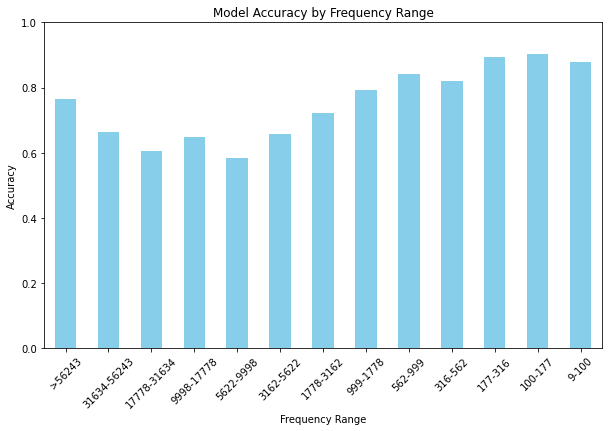

In [ ]:
accuracy_by_bin = results.groupby('frequency_bin')['correct'].mean()

# Plot accuracy versus frequency range
plt.figure(figsize=(10, 6))
accuracy_by_bin.plot(kind='bar', color='skyblue')
plt.xlabel('Frequency Range')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Frequency Range')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [ ]:
accuracy_by_bin

frequency_bin
>56243         0.764192
31634-56243    0.662162
17778-31634    0.606218
9998-17778     0.647799
5622-9998      0.584270
3162-5622      0.656977
1778-3162      0.722892
999-1778       0.792683
562-999        0.842697
316-562        0.819355
177-316        0.895062
100-177        0.903409
9-100          0.877193
Name: correct, dtype: float64

In [ ]:
accuracy_per_food = results.groupby('Food')['correct'].mean()
accuracy_per_food = accuracy_per_food.sort_values(ascending = False)
accuracy_per_food

Food
Cranberry Juice    0.931034
Chicken            0.929936
Cream              0.888235
Grape Juice        0.866667
Apple Juice        0.824242
Milk0              0.780822
Beef               0.755274
Half and Half      0.750000
Milk1              0.750000
Soy Bean           0.742308
Tomato Paste       0.687943
Yogurt             0.680982
Orange Juice       0.675862
Veg Soup           0.656977
Milk2              0.595506
Milk34             0.575000
Name: correct, dtype: float64

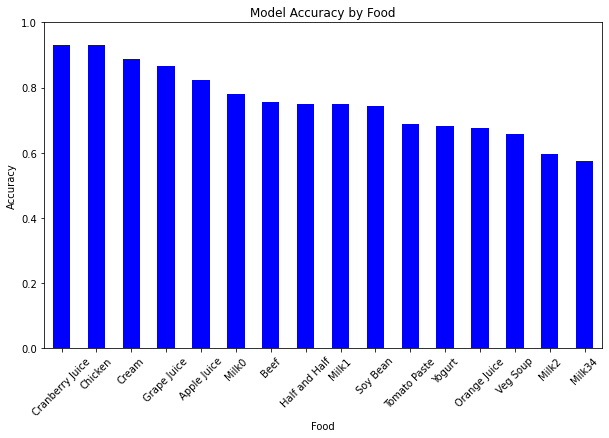

In [ ]:
accuracy_per_food = accuracy_per_food.sort_values(ascending = False)
accuracy_per_food
plt.figure(figsize=(10, 6))
accuracy_per_food.plot(kind='bar', color='blue')
plt.xlabel('Food')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Food')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()